In [1]:
# We start by loading the modules we will need to read csv's, tabulate and plot the resutls.
# Also telling ipython to plot the chart inline instead of opening a new window for the chart.

from __future__ import division
import csv
import operator
import tabulate
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
# This function aggregates the vies per month for the organizations in the csv.
# We take in a reader object and return a dictionary which contains the organization names and
#their respective views per month.
def aggregator(reader):
    aggregated = defaultdict(int)

    for row in reader:
            aggregated[row["Organization Name"]] += int(row["Views per Month"])
    return aggregated


In [3]:
# The sorter function takes the aggregated dictionary we produced and sorts it by value (views in our case).
# We return a list of tuples.
def sorter(aggregated):
    sorted_dict = sorted(aggregated.items(), key=operator.itemgetter(1), reverse=True)

    return sorted_dict


In [4]:
# The top fuction takes the sorted list of tuiples we produced before and returns the top 10 values.
def top(sorted_dict):
    x = 0
    top = []
    while x < 10:
       top.append(sorted_dict[x])
       x+=1
    return top


In [5]:
# Here we use tabulate to produce a pretty table for the results.
# It will take a liste of tubles and print them to the screen in a nice table.
# In our case, it's intended to take the list of top ten organizations, but it can take the full list also.

def drawTable(top):

    print tabulate.tabulate(top, headers=["Organization","Views per Month"])

    return

In [6]:
# drawChart takes a list of x values and list of y values and plots them in a bar chart.
# We get the y values from the top 10 sorted values of the tuples.
# The x values were set statically to space the bars since independent variable is non-numeric.

def drawChart(x_val, y_val, xticks):
    plt.bar(x_val,y_val,10)
    plt.xticks(x_val,xticks,fontsize=10, rotation='vertical' )
    plt.xlabel('Organization Name')
    plt.ylabel('Views per Month')
    plt.title('Top 10 Visitors')
    plt.grid(True)
    plt.show()


Organization                                                               Views per Month
-----------------------------------------------------------------------  -----------------
US Census Bureau, Department of Commerce                                             81359
National Oceanic and Atmospheric Administration, Department of Commerce              71390
U.S. Geological Survey, Department of the Interior                                   57752
Department of Agriculture                                                            38913
U.S. Department of Health & Human Services                                           36056
Earth Data Analysis Center, University of New Mexico                                 23885
Department of Defense                                                                23607
Department of Transportation                                                         23558
Department of Education                                                              21636

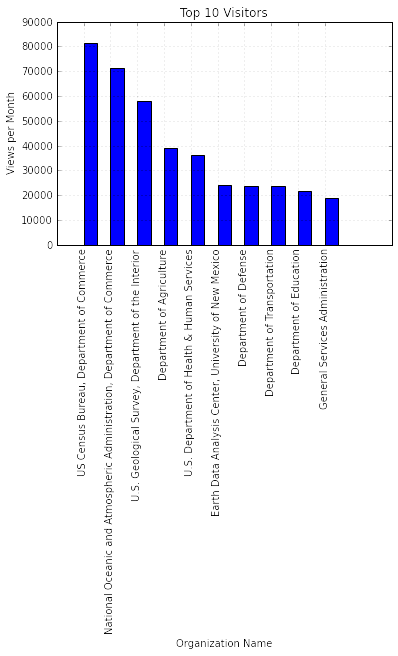

In [14]:
# In our main method, we open the csv and proceed to call the functions we defined above.
# I was originally intending for the script to take the file name as an arguemnt, but in the end
#decided to simply hard-code the file name for the purpose of this assignemnt.

def main():


    #f = open(sys.argv[1], 'rU')
    f = open('datagovdatasetsviewmetrics.csv', 'rb')
    try:
        
        reader = csv.DictReader(f)
        # We aggregate the views
        aggregated = aggregator(reader)
        # We sort by view
        sorted_dict = sorter(aggregated)
        # We grab the top 10
        top_ten = top(sorted_dict)


        #We gather the x and y values we will need to plot the chart
        y_val = [i[1] for i in top_ten]
        x_val = [20,40,60,80,100,120,140,160,180,200]
        xticks = [i[0] for i in top_ten]
        
        #we draw the table and chart.
        drawTable(top_ten)
        drawChart(x_val,y_val,xticks)


    finally:
        # We close the file
        f.close()
        
%matplotlib inline
main()